In [2]:
import IPython.display as idp

import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
df = pd.read_csv("/Users/trucle/Desktop/MATH250/Project/train.csv")

,song_id,filename,filepath,genre_id,genre
0,10150,010150.ogg,train/010150.ogg,7,Instrumental
1,7358,007358.ogg,train/007358.ogg,2,Punk
2,20573,020573.ogg,train/020573.ogg,5,Folk
3,11170,011170.ogg,train/011170.ogg,12,Old-Time / Historic
4,16662,016662.ogg,train/016662.ogg,1,Rock
...,...,...,...,...,...
19916,9337,009337.ogg,train/009337.ogg,0,Electronic
19917,8340,008340.ogg,train/008340.ogg,4,Hip-Hop
19918,16248,016248.ogg,train/016248.ogg,4,Hip-Hop
19919,11875,011875.ogg,train/011875.ogg,2,Punk


In [42]:
# Subsetting for labels 1, 4, 11, 12, and 13
genre = [1, 4, 11, 12, 13]
df_new = df.iloc[np.where(df.genre_id.isin(genre))]
df_new



,song_id,filename,filepath,genre_id,genre
3,11170,011170.ogg,train/011170.ogg,12,Old-Time / Historic
4,16662,016662.ogg,train/016662.ogg,1,Rock
5,1019,001019.ogg,train/001019.ogg,1,Rock
16,6746,006746.ogg,train/006746.ogg,1,Rock
17,6501,006501.ogg,train/006501.ogg,1,Rock
...,...,...,...,...,...
19912,22703,022703.ogg,train/022703.ogg,1,Rock
19914,2022,002022.ogg,train/002022.ogg,1,Rock
19917,8340,008340.ogg,train/008340.ogg,4,Hip-Hop
19918,16248,016248.ogg,train/016248.ogg,4,Hip-Hop


In [43]:
# Output the subset to another csv
import os  
os.makedirs('/Users/trucle/Desktop/MATH250', exist_ok=True)  
df_new.to_csv('Users/trucle/Desktop/MATH250/out.csv')


In [50]:
# Feature extractions using rolling-window frames of 5 seconds each 
train_df = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/out_2.csv')

genre = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/genres.csv')
file = open('/Users/trucle/Desktop/MATH250/Project/reduce_.csv', 'w')
header = 'filename genre_id avg_contrast_5 avg_contrast_15 avg_contrast_10 avg_contrast_20 avg_contrast_25 avg_contrast_30 avg_harmonic_5 avg_harmonic_10 avg_harmonic_15 avg_harmonic_20 avg_harmonic_25 avg_harmonic_30 avg_chroma_stft_5 avg_chroma_stft_10 avg_chroma_stft_15 avg_chroma_stft_20 avg_chroma_stft_25 avg_chroma_stft_30 avg_rmse_5 avg_rmse_10 avg_rmse_15 avg_rmse_20 avg_rmse_25 avg_rmse_30 avg_spectral_centroid_5 avg_spectral_centroid_10 avg_spectral_centroid_15 avg_spectral_centroid_20 avg_spectral_centroid_25 avg_spectral_centroid_30 avg_spectral_bandwidth_5 avg_spectral_bandwidth_10 avg_spectral_bandwidth_15 avg_spectral_bandwidth_20 avg_spectral_bandwidth_25 avg_spectral_bandwidth_30 avg_rolloff_5 avg_rolloff_10 avg_rolloff_15 avg_rolloff_20 avg_rolloff_20 avg_rolloff_30 avg_zero_crossing_rate '
for i in range(1, 21):
    header += f' avg_mfcc{i}'
header += ' label'
header = header.split()
tot_rows = train_df.shape[0]
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i in range(tot_rows):
        ID = train_df['song_id'][i]
        genre_id = train_df['genre_id'][i]
        source = train_df['filepath'][i]
        file_name = '/Users/trucle/Desktop/MATH250/Project/'+source
        y,sr = librosa.load(file_name)

        # creating the 5 seconds window frames going from 0 to 29 seconds for all audio files
        new_y_5 = y[int(0 * sr): int(5 * sr)]
        new_y_10 = y[int(5 * sr): int(10 * sr)]
        new_y_15 = y[int(10 * sr): int(15 * sr)]
        new_y_20 = y[int(15 * sr): int(20 * sr)]
        new_y_25 = y[int(20 * sr): int(25 * sr)]
        new_y_30 = y[int(25 * sr): int(29 * sr)]

        # Extracting the spectral constrast 
        S_5,phase = librosa.magphase(librosa.stft(new_y_5))
        S_10,phase = librosa.magphase(librosa.stft(new_y_10))
        S_15,phase = librosa.magphase(librosa.stft(new_y_15))
        S_20,phase = librosa.magphase(librosa.stft(new_y_20))
        S_25,phase = librosa.magphase(librosa.stft(new_y_25))
        S_30,phase = librosa.magphase(librosa.stft(new_y_30))

        contrast_5 = librosa.feature.spectral_contrast(S=S_5,sr=sr)
        contrast_10 = librosa.feature.spectral_contrast(S=S_10,sr=sr)
        contrast_15 = librosa.feature.spectral_contrast(S=S_15,sr=sr)
        contrast_20 = librosa.feature.spectral_contrast(S=S_20,sr=sr)
        contrast_25 = librosa.feature.spectral_contrast(S=S_25,sr=sr)
        contrast_30 = librosa.feature.spectral_contrast(S=S_30,sr=sr)

        # Extracting the harmonics 
        y_harmonic_5 = librosa.effects.harmonic(y=new_y_5)
        y_harmonic_10 = librosa.effects.harmonic(y=new_y_10)
        y_harmonic_15 = librosa.effects.harmonic(y=new_y_15)
        y_harmonic_20 = librosa.effects.harmonic(y=new_y_20)
        y_harmonic_25 = librosa.effects.harmonic(y=new_y_25)
        y_harmonic_30 = librosa.effects.harmonic(y=new_y_30)

        # Extracting the chroma shift
        chroma_stft_5 = librosa.feature.chroma_stft(y=new_y_5, sr=sr)
        chroma_stft_10 = librosa.feature.chroma_stft(y=new_y_10, sr=sr)
        chroma_stft_15 = librosa.feature.chroma_stft(y=new_y_15, sr=sr)
        chroma_stft_20 = librosa.feature.chroma_stft(y=new_y_20, sr=sr)
        chroma_stft_25 = librosa.feature.chroma_stft(y=new_y_25, sr=sr)
        chroma_stft_30 = librosa.feature.chroma_stft(y=new_y_30, sr=sr)

        # Extracting the root-mean-square of each window
        rmse_5 = librosa.feature.rms(y=new_y_5)
        rmse_10 = librosa.feature.rms(y=new_y_10)
        rmse_15 = librosa.feature.rms(y=new_y_15)
        rmse_20 = librosa.feature.rms(y=new_y_20)
        rmse_25 = librosa.feature.rms(y=new_y_25)
        rmse_30 = librosa.feature.rms(y=new_y_30)

        # Extracting the spectral centroid for each window
        spec_cent_5 = librosa.feature.spectral_centroid(y=new_y_5, sr=sr)
        spec_cent_10 = librosa.feature.spectral_centroid(y=new_y_10, sr=sr)
        spec_cent_15 = librosa.feature.spectral_centroid(y=new_y_15, sr=sr)
        spec_cent_20 = librosa.feature.spectral_centroid(y=new_y_20, sr=sr)
        spec_cent_25 = librosa.feature.spectral_centroid(y=new_y_25, sr=sr)
        spec_cent_30 = librosa.feature.spectral_centroid(y=new_y_30, sr=sr)

        # Extracting the spectral bandwidth
        spec_bw_5 = librosa.feature.spectral_bandwidth(y=new_y_10, sr=sr)
        spec_bw_10 = librosa.feature.spectral_bandwidth(y=new_y_20, sr=sr)
        spec_bw_15 = librosa.feature.spectral_bandwidth(y=new_y_30, sr=sr)
        spec_bw_20 = librosa.feature.spectral_bandwidth(y=new_y_10, sr=sr)
        spec_bw_25 = librosa.feature.spectral_bandwidth(y=new_y_20, sr=sr)
        spec_bw_30 = librosa.feature.spectral_bandwidth(y=new_y_30, sr=sr)

        # Extracting the spectral rolloff
        rolloff_5 = librosa.feature.spectral_rolloff(y=new_y_5, sr=sr)
        rolloff_10 = librosa.feature.spectral_rolloff(y=new_y_10, sr=sr)
        rolloff_15 = librosa.feature.spectral_rolloff(y=new_y_15, sr=sr)
        rolloff_20 = librosa.feature.spectral_rolloff(y=new_y_20, sr=sr)
        rolloff_25 = librosa.feature.spectral_rolloff(y=new_y_25, sr=sr)
        rolloff_30 = librosa.feature.spectral_rolloff(y=new_y_30, sr=sr)

        # Extracting the zero cross rate for the entire audio file
        zcr = librosa.feature.zero_crossing_rate(y)

        # Extracting the Mel-Fequency 
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{ID} {genre_id} {np.mean(contrast_5)} {np.mean(contrast_10)} {np.mean(contrast_15)} {np.mean(contrast_20)} {np.mean(contrast_25)} {np.mean(contrast_30)} {np.mean(y_harmonic_5)} {np.mean(y_harmonic_10)} {np.mean(y_harmonic_15)} {np.mean(y_harmonic_20)} {np.mean(y_harmonic_25)} {np.mean(y_harmonic_30)} {np.mean(chroma_stft_5)} {np.mean(chroma_stft_10)} {np.mean(chroma_stft_15)} {np.mean(chroma_stft_20)} {np.mean(chroma_stft_25)} {np.mean(chroma_stft_30)} {np.mean(rmse_5)} {np.mean(rmse_10)} {np.mean(rmse_15)} {np.mean(rmse_20)} {np.mean(rmse_25)} {np.mean(rmse_30)} {np.mean(spec_cent_5)} {np.mean(spec_cent_10)} {np.mean(spec_cent_5)} {np.mean(spec_cent_20)} {np.mean(spec_cent_25)} {np.mean(spec_cent_30)} {np.mean(spec_bw_5)} {np.mean(spec_bw_10)} {np.mean(spec_bw_15)} {np.mean(spec_bw_20)} {np.mean(spec_bw_25)} {np.mean(spec_bw_30)} {np.mean(rolloff_5)} {np.mean(rolloff_10)} {np.mean(rolloff_15)} {np.mean(rolloff_20)} {np.mean(rolloff_25)} {np.mean(rolloff_30)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        
        file = open('/Users/trucle/Desktop/MATH250/Project/reduce.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

# Exploratory Data Analysis

In [6]:
df_new = pd.read_csv('/Users/trucle/Desktop/MATH250/Project/working/features_data.csv')


In [7]:
# Look at the audio files breakdown per genre
print(sum(df_new["genre_id"]== 1))
print(sum(df_new["genre_id"]== 4))
print(sum(df_new["genre_id"]== 11))
print(sum(df_new["genre_id"]== 12))
print(sum(df_new["genre_id"]== 13))

3095
1757
495
408
306


Text(0.5, 1.0, 'Histogram of Different Genres Samples')

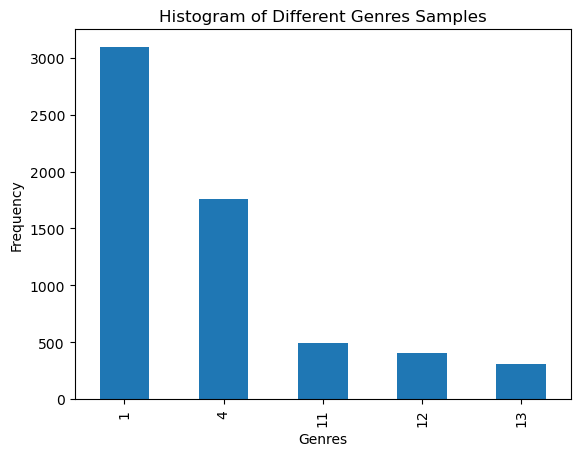

In [8]:
df_new.genre_id.value_counts().plot(kind = 'bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Histogram of Different Genres Samples')

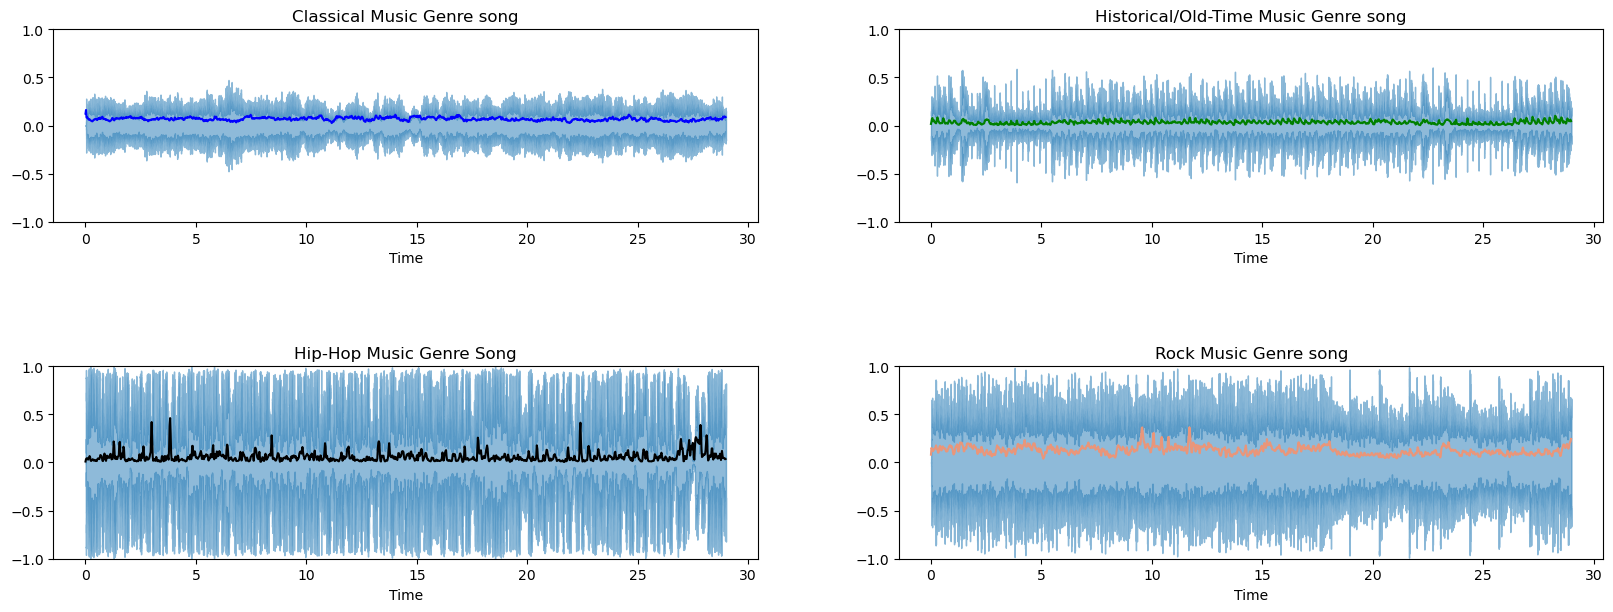

In [10]:
classical, sr = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/005121.ogg', duration=29)
historical ,_ = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/015947.ogg', duration=29)
hiphop,_ = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/015915.ogg', duration=29)
rock, _ = librosa.load('/Users/trucle/Desktop/MATH250/Project/train/016662.ogg', duration=29)

# https://www.analyticsvidhya.com/blog/2022/01/analysis-of-zero-crossing-rates-of-different-music-genre-tracks/

FRAME_SIZE = 1024
HOP_LENGTH = 512

zcr_classical = librosa.feature.zero_crossing_rate(classical, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_historical = librosa.feature.zero_crossing_rate(historical, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_hiphop = librosa.feature.zero_crossing_rate(hiphop, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_rock = librosa.feature.zero_crossing_rate(rock, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

frames = range(len(zcr_classical))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(20, 20))
ax = plt.subplot(5, 2, 1)
librosa.display.waveshow(classical, alpha=0.5)
plt.plot(t, zcr_classical, color="b")
plt.ylim((-1, 1))
plt.title("Classical Music Genre song")

plt.subplot(5, 2, 2)
librosa.display.waveshow(historical, alpha=0.5)
plt.plot(t, zcr_historical, color="g")
plt.ylim((-1, 1))
plt.title("Historical/Old-Time Music Genre song")

plt.subplot(5, 2, 3)
librosa.display.waveshow(hiphop, alpha=0.5)
plt.plot(t, zcr_hiphop, color="k")
plt.ylim((-1, 1))
plt.title("Hip-Hop Music Genre Song")

plt.subplot(5, 2, 4)
librosa.display.waveshow(rock, alpha=0.5)
plt.plot(t, zcr_rock, color="#E9967A")
plt.ylim((-1, 1))
plt.title("Rock Music Genre song")
plt.subplots_adjust(hspace = 0.75)